In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('Sugar11Futures_SB_NYB.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,15.080000,15.340000,15.040000,15.330000,15.330000,52804
2018-01-03,15.350000,15.370000,15.180000,15.310000,15.310000,59103
2018-01-04,15.270000,15.340000,14.850000,15.250000,15.250000,67438
2018-01-05,15.180000,15.240000,14.980000,15.080000,15.080000,45961
2018-01-08,14.990000,15.050000,14.540000,14.780000,14.780000,90152
...,...,...,...,...,...,...
2022-12-23,20.950001,21.180000,20.809999,20.980000,20.980000,33246
2022-12-27,20.980000,20.990000,20.230000,20.320000,20.320000,44670
2022-12-28,20.270000,20.490000,20.100000,20.160000,20.160000,49490


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,15.080000,15.340000,15.040000,15.330000,15.330000,52804,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,15.350000,15.370000,15.180000,15.310000,15.310000,59103,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,15.270000,15.340000,14.850000,15.250000,15.250000,67438,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,15.180000,15.240000,14.980000,15.080000,15.080000,45961,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,14.990000,15.050000,14.540000,14.780000,14.780000,90152,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,20.950001,21.180000,20.809999,20.980000,20.980000,33246,22.800000,43.5,1.0,0.137912,9.341758
2022-12-27,20.980000,20.990000,20.230000,20.320000,20.320000,44670,22.661798,36.7,2.7,0.023708,7.328090
2022-12-28,20.270000,20.490000,20.100000,20.160000,20.160000,49490,22.579070,37.6,0.7,0.067294,7.233721


In [6]:
train_data_arg = data_arg[:'2022-12']
test_data_arg = data_arg['2022-12':]

train_data_bra = data_bra[:'2022-12']
test_data_bra = data_bra['2022-12':]

train_data_cal = data_cal[:'2022-12']
test_data_cal = data_cal['2022-12':]

train_data_ill = data_ill[:'2022-12']
test_data_ill = data_ill['2022-12':]

train_data_iow = data_iow[:'2022-12']
test_data_iow = data_iow['2022-12':]

train_data_min = data_min[:'2022-12']
test_data_min = data_min['2022-12':]

train_data_neb = data_neb[:'2022-12']
test_data_neb = data_neb['2022-12':]


In [7]:
train_data_arg.shape

(1237, 11)

In [8]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [9]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

AutoARIMA using weather data

In [10]:
import pmdarima as pm
import matplotlib.pyplot as plt

In [11]:
# Fit the ARIMA model with exogenous variables
model_arg = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_arg, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_arg.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1237
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -44.504
Date:                Sat, 08 Apr 2023   AIC                             97.008
Time:                        00:03:56   BIC                            117.486
Sample:                             0   HQIC                           104.711
                               - 1237                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0017      0.004     -0.468      0.639      -0.009       0.005
Mean_Precip       -0.0096      0.065     -0.148      0.883      -0.137       0.118
Mean_WindSpeed     0.0038      0.005

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


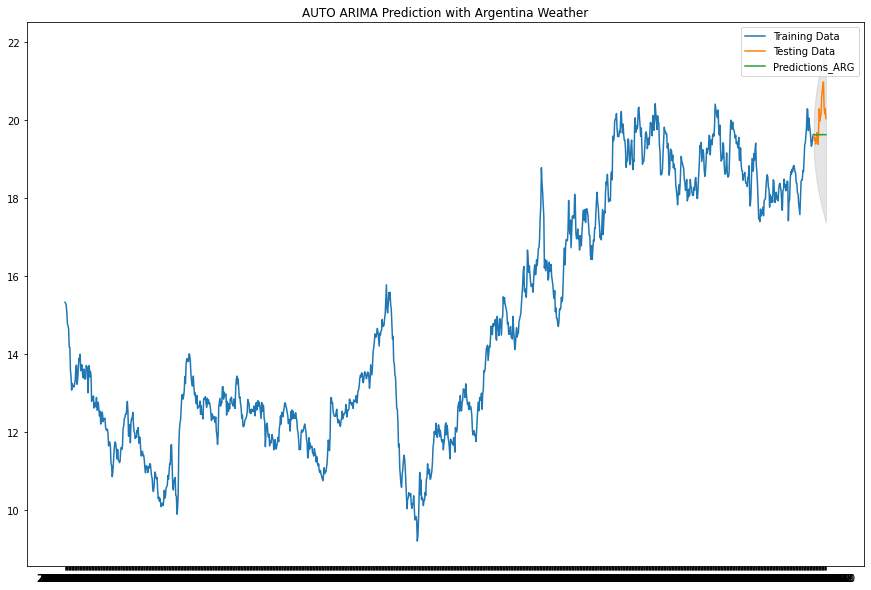

In [12]:
# Forecast
forecast_arg, confint_arg = model_arg.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_arg, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_arg = pd.DataFrame(forecast_arg, index=test_data_arg.index, columns=['Predictions_ARG'])
confint_arg = pd.DataFrame(confint_arg, index=test_data_arg.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')
plt.fill_between(confint_arg.index, confint_arg['Lower_CI'], confint_arg['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Argentina Weather')
plt.show()

In [13]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_arg['Predictions_ARG'])

-0.6589009955746838

In [14]:
# Fit the ARIMA model with exogenous variables for BRA
model_bra = pm.auto_arima(train_data_bra['Close'], exogenous=exog_train_bra, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)
# Print the summary of the model
print(model_bra.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1237
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -42.947
Date:                Sat, 08 Apr 2023   AIC                             93.894
Time:                        00:04:09   BIC                            114.372
Sample:                             0   HQIC                           101.597
                               - 1237                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0111      0.008     -1.437      0.151      -0.026       0.004
Mean_Precip       -0.6126      0.506     -1.211      0.226      -1.604       0.379
Mean_WindSpeed     0.0101      0.014

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


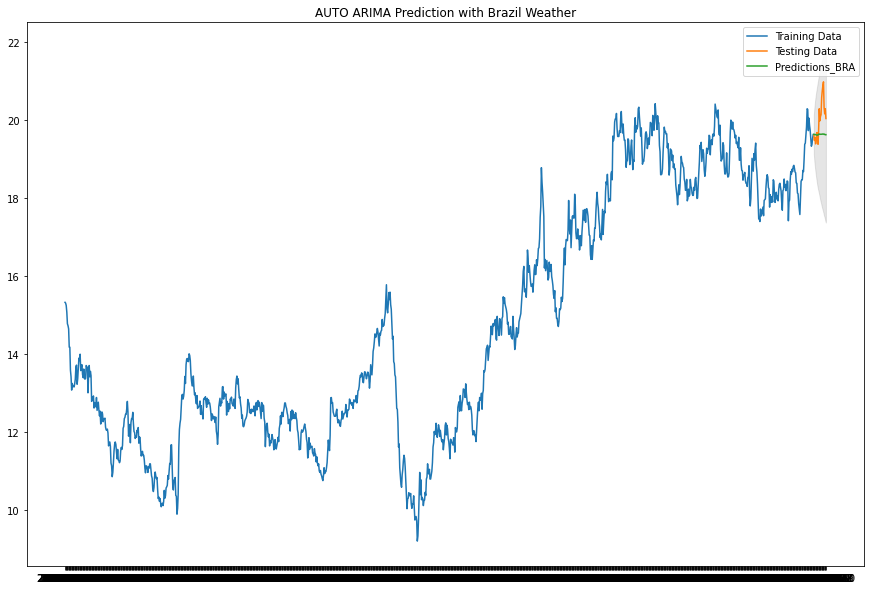

In [15]:
# Forecast for Brazil
forecast_bra, confint_bra = model_bra.predict(n_periods=len(test_data_bra), 
                                               exogenous=exog_test_bra, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for Brazil
pred_bra = pd.DataFrame(forecast_bra, index=test_data_bra.index, columns=['Predictions_BRA'])
confint_bra = pd.DataFrame(confint_bra, index=test_data_bra.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for Brazil
plt.figure(figsize=(15, 10))
plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')
plt.fill_between(confint_bra.index, confint_bra['Lower_CI'], confint_bra['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Brazil Weather')
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2_score(test_data_bra['Close'], pred_bra['Predictions_BRA'])

-0.6230292644949464

In [17]:
# Fit the ARIMA model with exogenous variables for California
model_cal = pm.auto_arima(train_data_cal['Close'], exogenous=exog_train_cal, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model for California
print(model_cal.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1239
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -44.925
Date:                Sat, 08 Apr 2023   AIC                             97.850
Time:                        00:04:20   BIC                            118.335
Sample:                             0   HQIC                           105.554
                               - 1239                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp          0.0037      0.005      0.796      0.426      -0.005       0.013
Mean_Precip       -0.0070      0.098     -0.071      0.943      -0.199       0.185
Mean_WindSpeed     0.0023      0.006

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


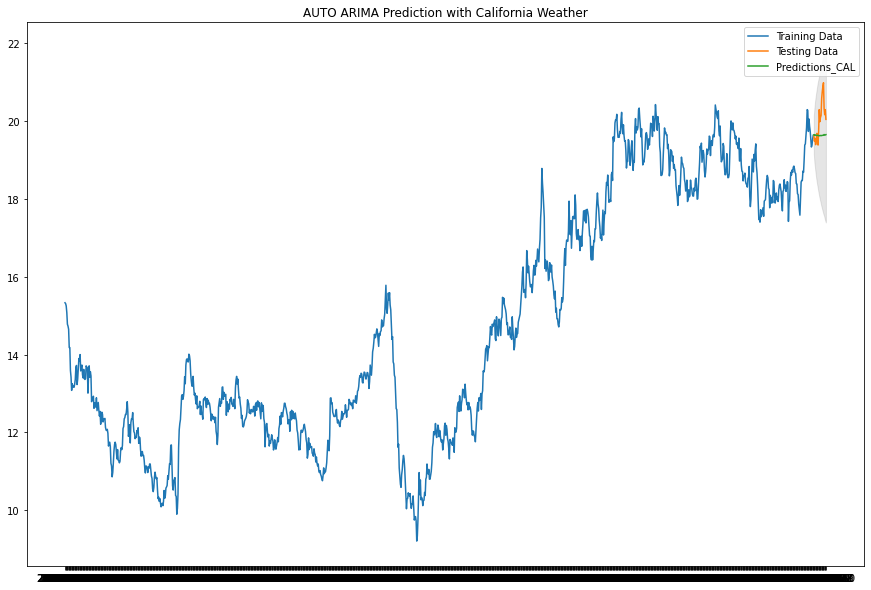

In [18]:
# Forecast for California
forecast_cal, confint_cal = model_cal.predict(n_periods=len(test_data_cal), 
                                               exogenous=exog_test_cal, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for California
pred_cal = pd.DataFrame(forecast_cal, index=test_data_cal.index, columns=['Predictions_CAL'])
confint_cal = pd.DataFrame(confint_cal, index=test_data_cal.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for California
plt.figure(figsize=(15, 10))
plt.plot(train_data_cal.index, train_data_cal['Close'], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')
plt.fill_between(confint_cal.index, confint_cal['Lower_CI'], confint_cal['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with California Weather')
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(test_data_cal['Close'], pred_cal['Predictions_CAL'])

-0.6477076918298683

In [20]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_ill = pm.auto_arima(train_data_ill['Close'], exogenous=exog_train_ill, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_ill.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1239
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -44.866
Date:                Sat, 08 Apr 2023   AIC                             97.731
Time:                        00:04:31   BIC                            118.216
Sample:                             0   HQIC                           105.436
                               - 1239                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp          0.0013      0.002      0.657      0.511      -0.003       0.005
Mean_Precip        0.0198      0.043      0.457      0.648      -0.065       0.105
Mean_WindSpeed    -0.0003      0.003

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


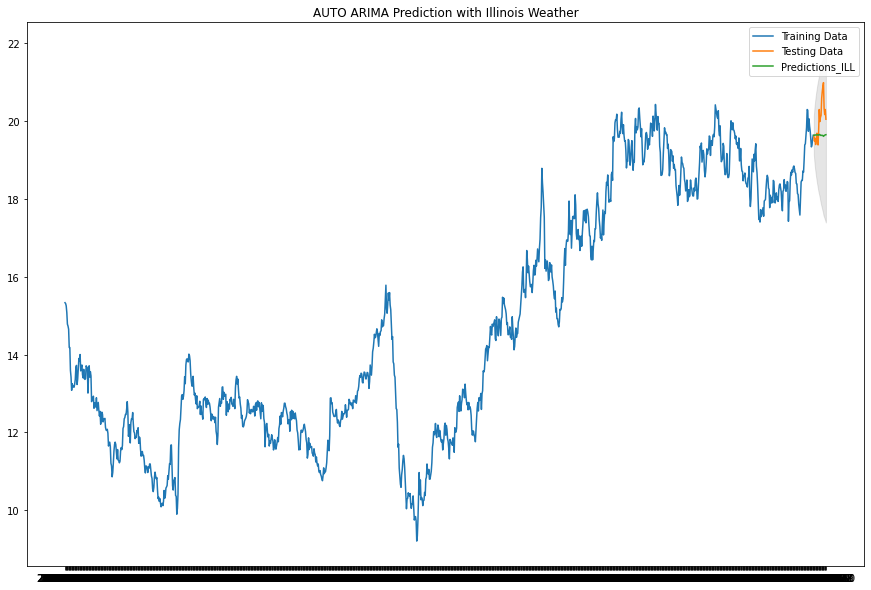

In [21]:
# Forecast
forecast_ill, confint_ill = model_ill.predict(n_periods=len(test_data_ill), 
                                               exogenous=exog_test_ill, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_ill = pd.DataFrame(forecast_ill, index=test_data_ill.index, columns=['Predictions_ILL'])
confint_ill = pd.DataFrame(confint_ill, index=test_data_ill.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')
plt.fill_between(confint_ill.index, confint_ill['Lower_CI'], confint_ill['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Illinois Weather')
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2_score(test_data_ill['Close'], pred_ill['Predictions_ILL'])

-0.6684329513331868

In [23]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_iow = pm.auto_arima(train_data_iow['Close'], exogenous=exog_train_iow, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_iow.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1239
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -43.548
Date:                Sat, 08 Apr 2023   AIC                             95.095
Time:                        00:04:42   BIC                            115.580
Sample:                             0   HQIC                           102.800
                               - 1239                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp          0.0004      0.002      0.197      0.844      -0.003       0.004
Mean_Precip        0.0788      0.056      1.412      0.158      -0.031       0.188
Mean_WindSpeed     0.0011      0.002

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


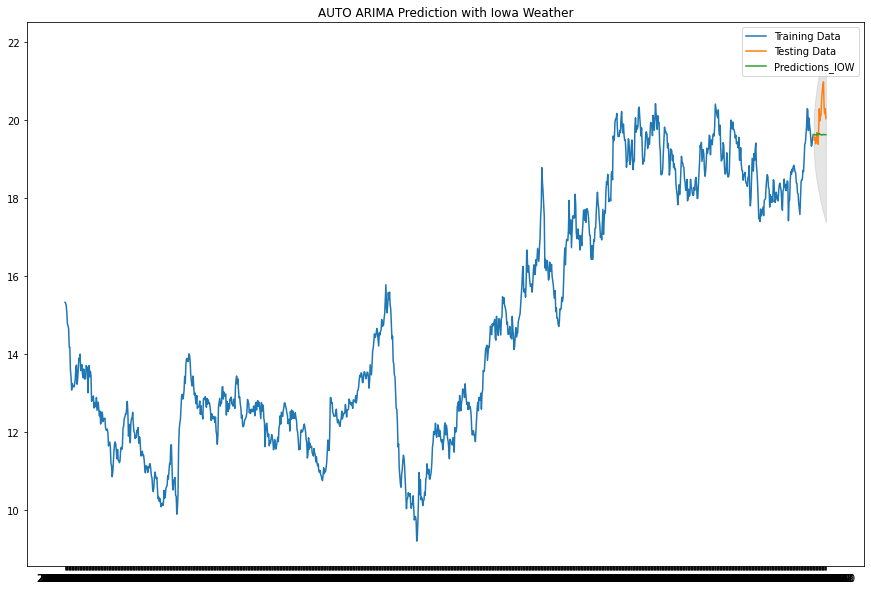

In [24]:
forecast_iow, confint_iow = model_iow.predict(n_periods=len(test_data_iow), 
                                               exogenous=exog_test_iow, return_conf_int=True)

pred_iow = pd.DataFrame(forecast_iow, index=test_data_iow.index, columns=['Predictions_IOW'])
confint_iow = pd.DataFrame(confint_iow, index=test_data_iow.index, columns=['Lower_CI', 'Upper_CI'])

plt.figure(figsize=(15, 10))
plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')
plt.fill_between(confint_iow.index, confint_iow['Lower_CI'], confint_iow['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Iowa Weather')
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(test_data_iow['Close'], pred_iow['Predictions_IOW'])

-0.658092300453935

In [26]:
# Fit the ARIMA model with exogenous variables
model_min = pm.auto_arima(train_data_min['Close'], exogenous=exog_train_min, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_min.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1239
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -42.635
Date:                Sat, 08 Apr 2023   AIC                             93.270
Time:                        00:04:54   BIC                            113.755
Sample:                             0   HQIC                           100.974
                               - 1239                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp          0.0028      0.002      1.622      0.105      -0.001       0.006
Mean_Precip        0.0217      0.064      0.339      0.734      -0.104       0.147
Mean_WindSpeed     0.0028      0.002

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


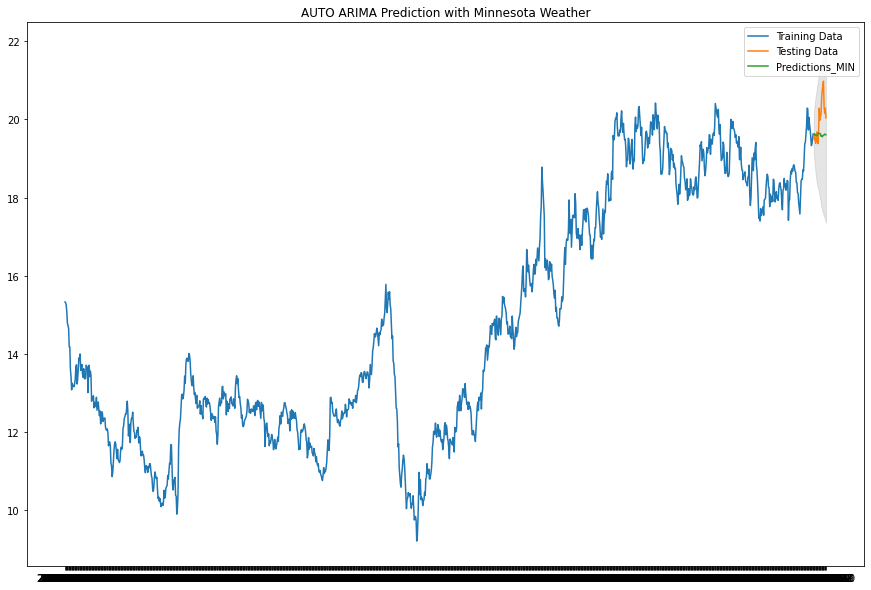

In [27]:
# Forecast
forecast_min, confint_min = model_min.predict(n_periods=len(test_data_min), 
                                               exogenous=exog_test_min, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_min = pd.DataFrame(forecast_min, index=test_data_min.index, columns=['Predictions_MIN'])
confint_min = pd.DataFrame(confint_min, index=test_data_min.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')
plt.fill_between(confint_min.index, confint_min['Lower_CI'], confint_min['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Minnesota Weather')
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2_score(test_data_min['Close'], pred_min['Predictions_MIN'])

-0.7678831054894921

In [29]:
# Fit the ARIMA model with exogenous variables
model_neb = pm.auto_arima(train_data_neb['Close'], exogenous=exog_train_neb, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_neb.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1239
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -43.432
Date:                Sat, 08 Apr 2023   AIC                             94.864
Time:                        00:05:07   BIC                            115.349
Sample:                             0   HQIC                           102.569
                               - 1239                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0007      0.002     -0.370      0.711      -0.004       0.003
Mean_Precip       -0.0692      0.062     -1.109      0.267      -0.191       0.053
Mean_WindSpeed     0.0036      0.002

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


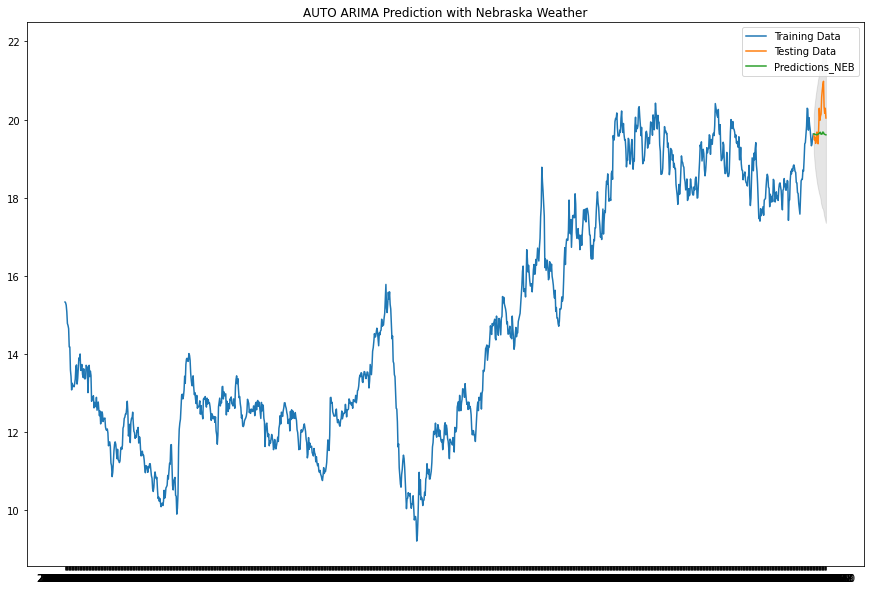

In [30]:
# Forecast
forecast_neb, confint_neb = model_neb.predict(n_periods=len(test_data_neb), 
                                               exogenous=exog_test_neb, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_neb = pd.DataFrame(forecast_neb, index=test_data_neb.index, columns=['Predictions_NEB'])
confint_neb = pd.DataFrame(confint_neb, index=test_data_neb.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')
plt.fill_between(confint_neb.index, confint_neb['Lower_CI'], confint_neb['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Nebraska Weather')
plt.show()

In [31]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred_neb['Predictions_NEB'])

-0.5953334984964089

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1237
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -32.601
Date:                Sat, 08 Apr 2023   AIC                            109.202
Time:                        00:05:29   BIC                            221.834
Sample:                             0   HQIC                           151.568
                               - 1237                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Mean_Temp_arg         -0.0013      0.004     -0.340      0.734      -0.009       0.006
Mean_Precip_arg        0.0003      0.068      0.004      0.997      -0.133       0.134
Mean_WindSpeed_arg  

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


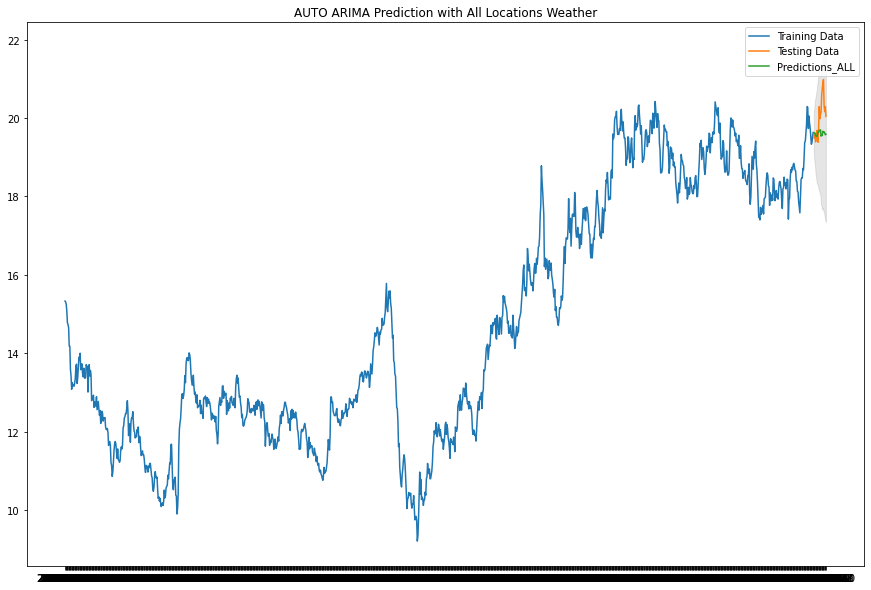

In [32]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)

# Fit the ARIMA model with exogenous variables
model_all = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_all, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_all.summary())

# Forecast
forecast_all, confint_all = model_all.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_all, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_all = pd.DataFrame(forecast_all, index=test_data_arg.index, columns=['Predictions_ALL'])
confint_all = pd.DataFrame(confint_all, index=test_data_arg.index, columns=['Lower_CI_ALL', 'Upper_CI_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_all.index, pred_all['Predictions_ALL'], label='Predictions_ALL')
plt.fill_between(confint_all.index, confint_all['Lower_CI_ALL'], confint_all['Upper_CI_ALL'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with All Locations Weather')
plt.show()

In [33]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_all['Predictions_ALL'])

-0.7005205273685766